# Crime Rate and Economic Inequality (Group 23)

## STAT 201 Group 23 Project Proposal

Crystal Zhao, Yuhei Arimoto, Tony Lee, Qiantong Huang

## Part 1: Introduction

Crime is a complex issue with various contributing factors. Poverty, economic inequality, and social conflicts such as political exclusion and relative deprivation are some of the identified factors that can lead to the occurrence of crime (Norrie, 2014). Numerous studies have shown a correlation between poverty and crime rates, highlighting the significance of economic inequality as a factor influencing crime rates (Sugiharti et al., 2023; Zhang, 2013).

To expand our understanding of the relationship between crime rates and economic inequality, this project aims to explore the correlation between specific types of crime and economic inequality. We will analyze crime data from the Vancouver Police Department on two Vancouver neighborhoods, Grandview-Woodland and Shaughnessy, to answer two questions: 
* Is the crime rate of Break and Enter Residential/Other type of crime higher in a wealthy neighborhood than in a poor neighborhood?
* Is the crime rate of Offence typo of crime lower in a wealthy neighborhood than in a poor neighborhood?

Grandview-Woodland, with a low median household income, will be classified as a poor neighborhood, while Shaughnessy, with a high median household income, will be classified as a wealthy neighborhood ("Grandview-Woodland", 2020; "Shaughnessy", 2020). The dataset includes information on the type, date, and location of all crimes reported in these two neighborhoods, and population values of 8430 for Shaughnessy and 29175 for Grandview-Woodland ("Grandview-Woodland", 2020; "Shaughnessy", 2020) will be used to calculate crime rates. Crime rate (location parameter) and standard deviation (scale parameter) will be used as response variables in our analysis.


## Part 2: Preliminary Results

#### 2.1: Data Exploration

Attach the libraries and set the seed:

In [59]:
# Attach the libraries.
library(tidyverse)
library(tidymodels)
library(cowplot)
library(GGally)
library(RColorBrewer)
library(ggplot2)
set.seed(1000)
options(repr.plot.width = 12, repr.plot.height = 8)

In [60]:
# load Grandview Woodland crime rate dataset from database
grandview_woodland_data <- read_csv("crimedata_csv_Grandview-Woodland_AllYears.csv", col_names = TRUE)
names(grandview_woodland_data) <- tolower(names(grandview_woodland_data))

#Get rid of any rows with NA
grandview_woodland_clean <- grandview_woodland_data |>
           filter_all(all_vars(!is.na(.)))

# View the cleaned dataframe.
head(grandview_woodland_clean)

Rows: 48142 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD
dbl (7): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


type,year,month,day,hour,minute,hundred_block,neighbourhood,x,y
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Break and Enter Commercial,2006,1,30,16,30,10XX CLARK DR,Grandview-Woodland,494382.4,5458077
Break and Enter Commercial,2006,11,11,16,0,10XX CLARK DR,Grandview-Woodland,494382.4,5458077
Break and Enter Commercial,2006,11,15,16,30,10XX CLARK DR,Grandview-Woodland,494382.4,5458077
Break and Enter Commercial,2022,4,3,0,0,10XX CLARK DR,Grandview-Woodland,494382.6,5458098
Break and Enter Commercial,2007,10,15,4,9,10XX COMMERCIAL DR,Grandview-Woodland,494937.3,5458069
Break and Enter Commercial,2006,4,9,23,30,10XX COMMERCIAL DR,Grandview-Woodland,494937.4,5458076


Figure 2.1.1: The initial Grandview Woodland dataset with the correct column names and after basic cleaning.

In [61]:
# load Shaughnessy crime rate dataset from database
shaughnessy_data <- read_csv("crimedata_csv_Shaughnessy_AllYears.csv", col_names = TRUE)
names(shaughnessy_data) <- tolower(names(shaughnessy_data))

#Get rid of any rows with NA
shaughnessy_clean <- shaughnessy_data |>
           filter_all(all_vars(!is.na(.)))

# View the cleaned dataframe.
head(shaughnessy_clean)

Rows: 8530 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD
dbl (7): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


type,year,month,day,hour,minute,hundred_block,neighbourhood,x,y
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Break and Enter Commercial,2022,2,23,23,0,10XX BALFOUR AVE,Shaughnessy,490699.8,5455444
Break and Enter Commercial,2022,2,25,10,15,10XX BALFOUR AVE,Shaughnessy,490699.8,5455444
Break and Enter Commercial,2022,4,30,22,45,10XX BALFOUR AVE,Shaughnessy,490699.8,5455444
Break and Enter Commercial,2018,2,2,17,0,10XX LAURIER AVE,Shaughnessy,490704.3,5455350
Break and Enter Commercial,2019,6,16,9,3,10XX LAURIER AVE,Shaughnessy,490704.3,5455350
Break and Enter Commercial,2021,2,15,17,19,10XX LAURIER AVE,Shaughnessy,490704.3,5455350


Figure 2.1.2: The initial Shaughnessy dataset with the correct column names and after basic cleaning.

To narrow down the focus of this study, 2012 to 2016 is chosen inclusive as the target years. Therefore, the two datas are filtered to contain only these five years of data in below. In addition, we want to focus primarily on the "Break and Enter Residential/Other" and "Offence against a person", so we filtered data further and selected only the year, type, neighborbood columns.

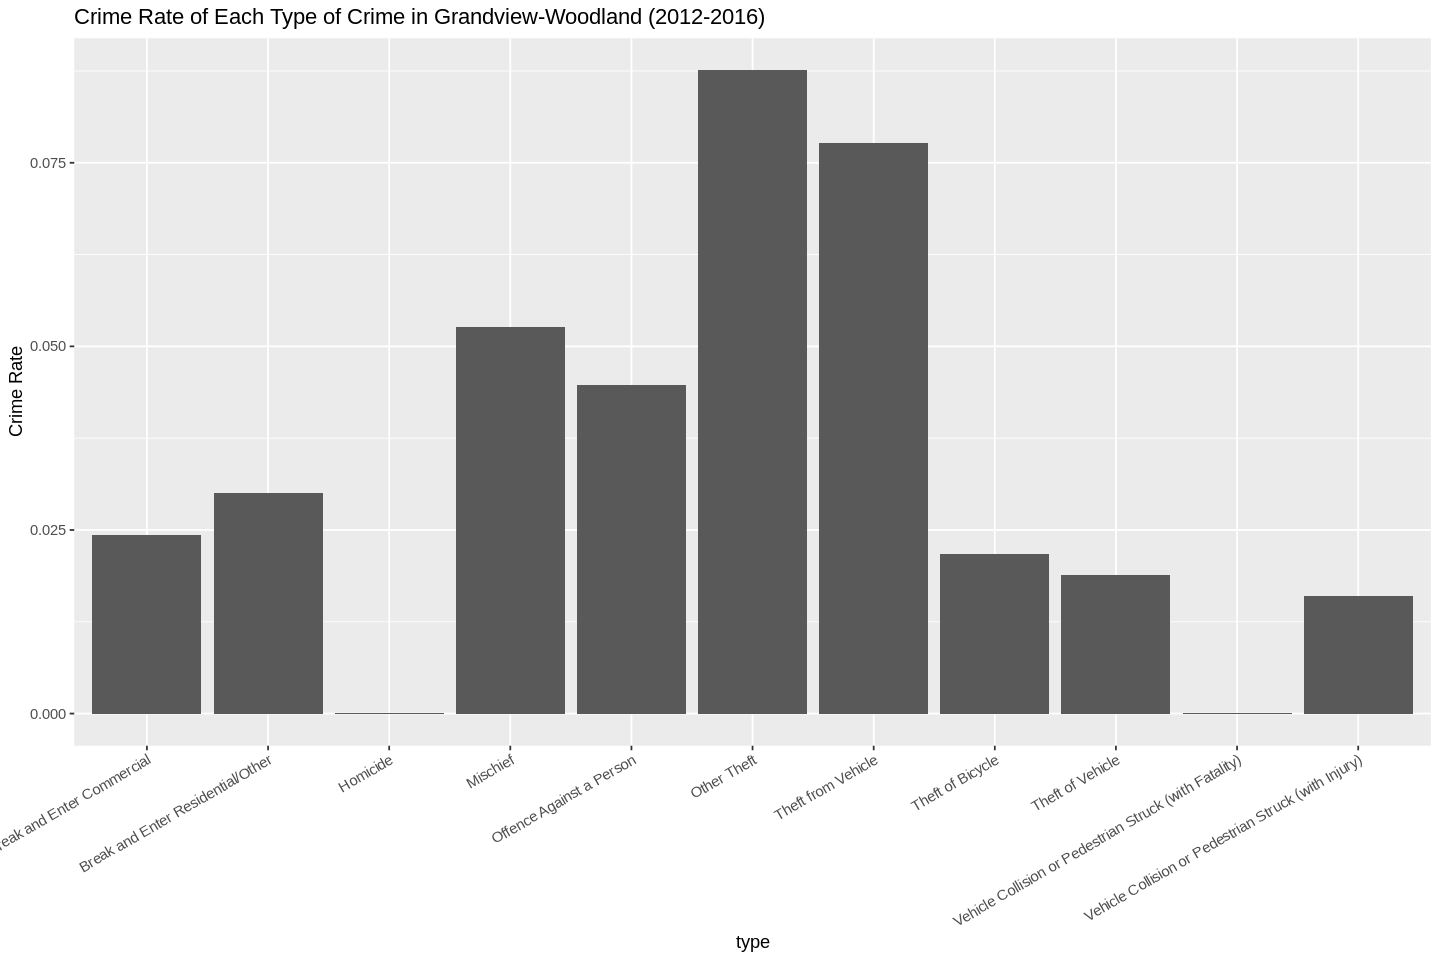

In [106]:
# Filtered data to only the desired years (2012-2016) with only these two columns selected
grandview_woodland_clean <- grandview_woodland_clean |>
    filter(year == 2012 | year == 2013 | year == 2014 | year == 2015 | year == 2016) |>
    select(type, year, neighbourhood)

grandview_woodland_props <- grandview_woodland_clean %>%
    group_by(type) %>%
    summarise(n = n()) %>%
    mutate(crime_rate = n / 29175)

grandview_woodland_prop_bars <- grandview_woodland_props %>%
    ggplot(aes(x = type, y = crime_rate)) +
    geom_bar(stat = 'identity') +
    theme(axis.text.x = element_text(angle = 30, hjust = 1)) +
    ylab("Crime Rate") +
    ggtitle("Crime Rate of Each Type of Crime in Grandview-Woodland (2012-2016)")

grandview_woodland_prop_bars

Figure 2.1.3: Plot showing crime rates of each type of crime in Grandview-Woodland between 2012 and 2016

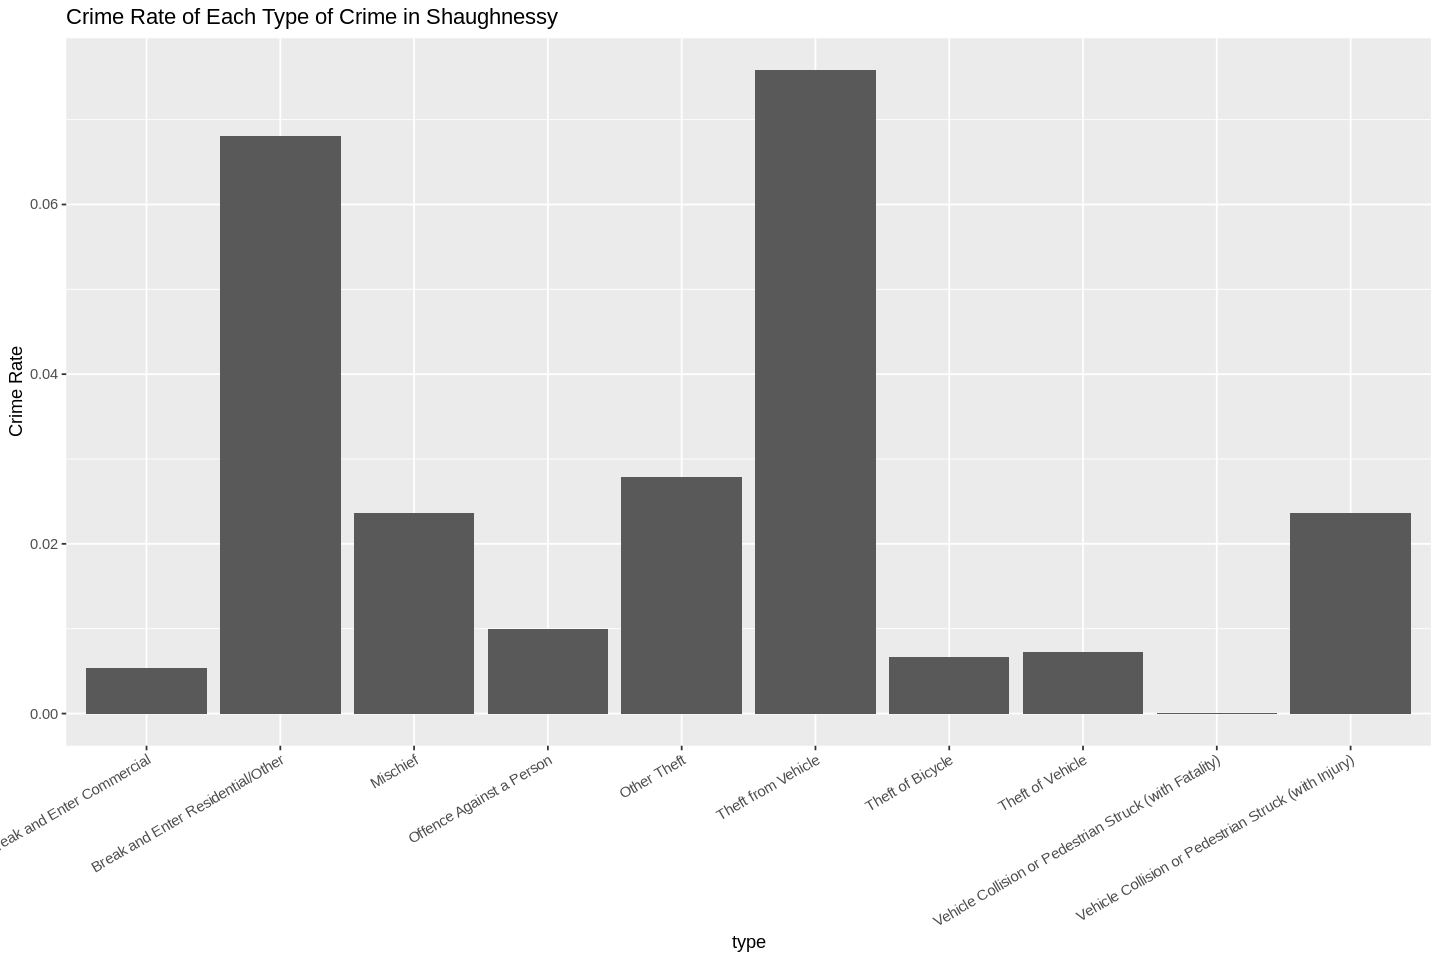

In [107]:
# Filtered data to only the desired years (2012-2016) with only these two columns selected
shaughnessy_clean <- shaughnessy_clean |>
    filter(year == 2012 | year == 2013 | year == 2014 | year == 2015 | year == 2016) |>
    select(type, year, neighbourhood)

shaughnessy_props <- shaughnessy_clean %>%
    group_by(type) %>%
    summarise(n = n()) %>%
    mutate(crime_rate = n / 8430)

shaughnessy_props_bars <- shaughnessy_props %>%
    ggplot(aes(x = type, y = crime_rate)) +
    geom_bar(stat = 'identity') +
    theme(axis.text.x = element_text(angle = 30, hjust = 1)) +
    ylab("Crime Rate") +
    ggtitle("Crime Rate of Each Type of Crime in Shaughnessy")

shaughnessy_props_bars

Figure 2.1.4: Plot showing crime rates of each type of crime in Shaughnessy between 2012 and 2016

`summarise()` has grouped output by 'type', 'neighbourhood'. You can override
using the `.groups` argument.


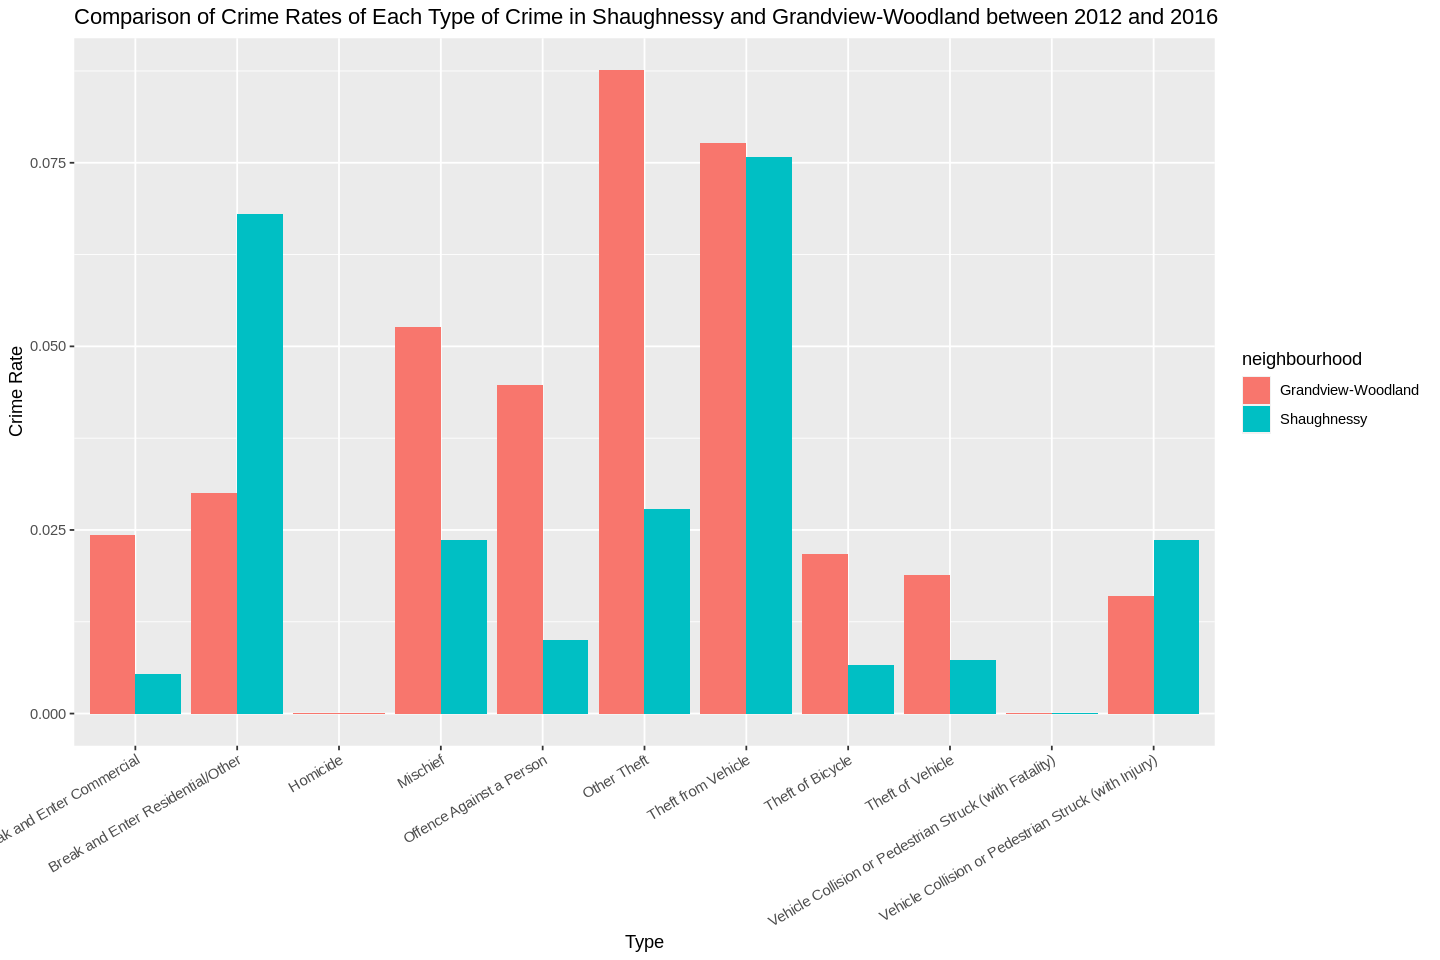

In [110]:
shaughnessy_with_pop <- shaughnessy_clean %>%
    mutate(population = 8430)

grandview_with_pop <- grandview_woodland_clean %>%
    mutate(population = 29175)

combined <- rbind(shaughnessy_with_pop, grandview_with_pop)

combined_props <- combined %>%
    group_by(type, neighbourhood, population) %>%
    summarise(n = n()) %>%
    mutate(crime_rate = n / population)

selected <- combined_props %>%
    filter(type == "Break and Enter Residential/Other" | type == "Offence Against a Person")
    
combined_dist <- combined_props %>%
    ggplot(aes(x = type, y = crime_rate, fill = neighbourhood)) +
    geom_bar(stat="identity", position = "dodge") +
    theme(axis.text.x = element_text(angle = 30, hjust = 1)) +
    labs(x = "Type", y = "Crime Rate") +
    ggtitle("Comparison of Crime Rates of Each Type of Crime in Shaughnessy and Grandview-Woodland between 2012 and 2016")

combined_dist

Figure 2.1.5: Plot showing comparison of crime rates of each type of crime in Shaughnessy and Grandview-Woodland between 2012 and 2016

In [112]:
selected

type,neighbourhood,population,n,crime_rate
<chr>,<chr>,<dbl>,<int>,<dbl>
Break and Enter Residential/Other,Grandview-Woodland,29175,876,0.030025707
Break and Enter Residential/Other,Shaughnessy,8430,574,0.068090154
Offence Against a Person,Grandview-Woodland,29175,1304,0.044695801
Offence Against a Person,Shaughnessy,8430,84,0.009964413


Figure 2.1.6: Table showing the crime rate of Break and Enter Residential/Other and Offence Against a Person in each neighborhood Grandview-Woodland and Shaughnessy between 2012 and 2016

## Part 3: Methods & Plan

Figure 2.1.5 suggests that the correlation between the crime rate and economic inequality might depend on the type of crime, and it also gives potential answers to our two questions that the crime rate of Break and Enter Residential/Other type of crime is higher in a wealthy neighborhood than in a poor neighborhood, and the crime rate of Offence typo crime is lower in a wealthy neighborhood than in a poor neighborhood. However, it is not enough to conclude them as they are just estimates of the crime rate based on data collected in the span of 5 years between 2012 and 2016. In order to address this gap, we will use bootstrapping to find a 95% confidence interval of the crime rate of each type of crime in each neighborhood. Furthermore, we will conduct hypothesis tests with permutation to answer two questions. To answer the first question, the alternative hypothesis will be “the crime rate of Break and Enter Residential/Other type of crime is higher in Shaughnessy than in Grandview-Woodland”. For the second question, the alternative hypothesis will be “the crime rate of Offence type of crime is lower in Shaughnessy than in Grandview-Woodland”. The null hypothesis will be “The crime rate is the same in two neighborhoods” for both questions.

Through bootstrapping and hypothesis tests, we expect to find that the crime rate of "Break and Enter Residential/Other" would be higher and "Offence against a person" would be lower in Shaughnessy than in Grandview Woodland. Therefore, the crime rate depends on the type of crime and neighborhoods, and neighborhoods with different income levels have different crime patterns. Based on this, we can provide recommendations for security measures tailored to each neighborhood. Residents and businesses in affluent neighborhoods like Shaughnessy should invest in security measures to prevent "Break and Enter Residential" crimes. In contrast, those in lower-income neighborhoods like Grandview-Woodland should focus on measures to prevent "Offence-related" crimes. 

This project can lead to future questions of if there are any other factors that affect the crime rate and on the effectiveness of existing security measures in each area at preventing crimes. 

## References

Grandview-Woodland Neighborhood Social Indicators Profile 2020. City of Vancouver. (2020). Retrieved March 19, 2023, from https://vancouver.ca/files/cov/social-indicators-profile-grandview-woodland.pdf 

Norrie, A. W., & Cambridge Core EBA eBooks Complete Collection. (2014). Crime, reason and history: A critical introduction to criminal law (Third ed.). Cambridge University Press. https://doi.org/10.1017/CBO9781139031851

Shaughnessy Neighborhood Social Indicators Profile 2020. City of Vancouver. (2020). https://vancouver.ca/files/cov/social-indicators-profile-shaughnessy.pdf

Sugiharti, L., Purwono, R., Esquivias, M. A., &amp; Rohmawati, H. (2023). The nexus between crime rates, poverty, and income inequality: A case study of indonesia. Economies, 11(2), 62. https://doi.org/10.3390/economies11020062 

The Vancouver Police Department. Crime Data [Data set]. https://geodash.vpd.ca/opendata/#

Zhang, W. (2013). The relationships between crime rate and income inequality: Evidence from China. The University of Texas at Austin. https://doi.org/https://repositories.lib.utexas.edu/handle/2152/22551 